In [1]:
import numpy as np
from scifit.solvers import linear, scientific, specials
from scifit.interfaces import generic

 - Le R2 est utile mais ne dis rien sur la distribution
 - Le chi2 est suffisament sensible pour rejeter un modèle qui a un bon r2
 - Les surface loss doivent s'interpréter avec discernement, les échelles sont importantes
 

In [2]:
class P2(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b):
        return a * np.power(x[:, 0], 2) + b
    
class P3(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b):
        return a * np.power(x[:, 0], 3) + b

class P3b(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b, c):
        return a * np.power(x[:, 0], 3) + b * np.power(x[:, 0], 2) + c

    
class P4(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b):
        return a * np.power(x[:, 0], 4) + b
    
class Pn(generic.FitSolverInterface):
    @staticmethod
    def model(x, n, a, b):
        return a * np.power(x[:, 0], n) + b

class exp(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b, c):
        return a * np.exp(b * x[:, 0]) + c

In [3]:
models = [
    P2(), P3(), P3b(), P4(), Pn(), exp()
]

In [4]:
data = models[0].synthetic_dataset(sigma=0.015, xmin=0.5, xmax=5., resolution=50, parameters=[2.0, 1.0], scale_mode="auto")

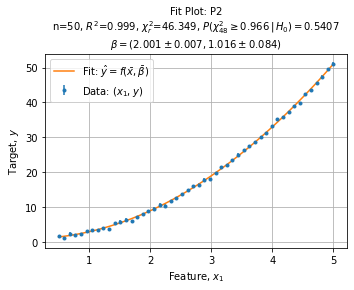

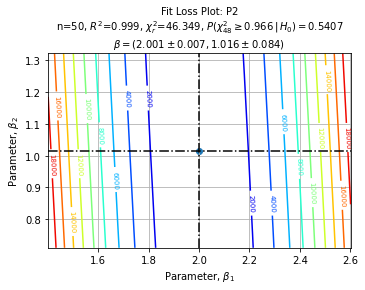

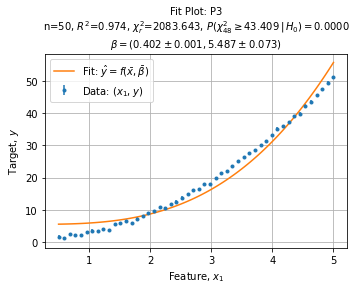

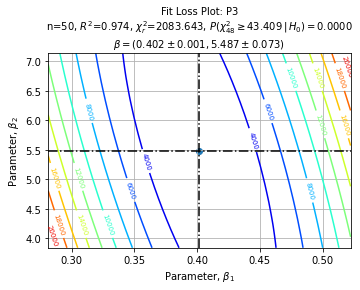

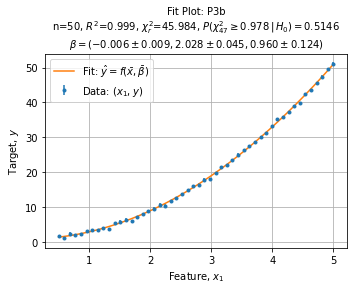

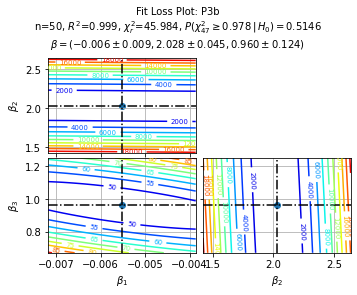

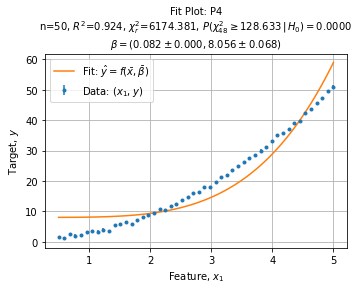

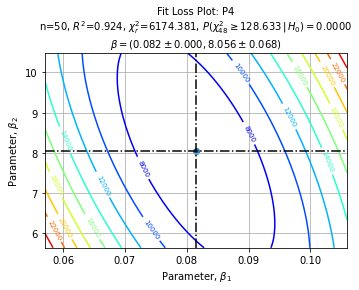

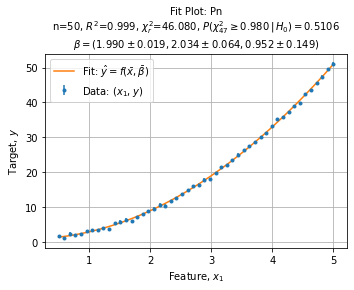

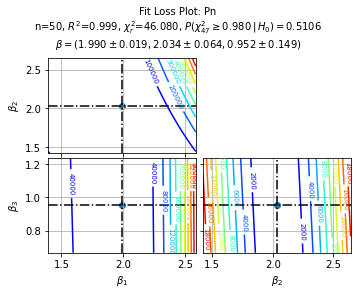

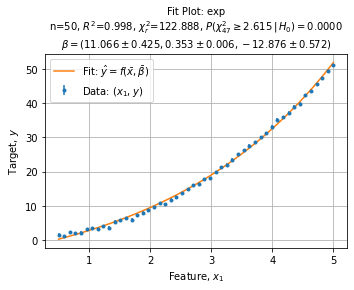

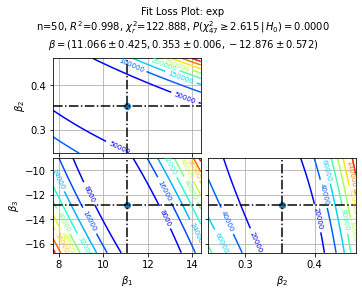

In [5]:
for model in models:
    _ = model.load(data)
    sol = model.fit()
    axe = model.plot_fit(title=model.__class__.__name__)
    axe = model.plot_loss(title=model.__class__.__name__)

<Axes3D: title={'center': 'Fit Loss Plot: \nn=50, $R^2$=0.998, $\\chi^2_r$=122.888, $P(\\chi^2_{47} \\geq 2.615 \\,|\\, H_0) = 0.0000$\n$\\beta = (11.066 \\pm 0.425, 0.353 \\pm 0.006, -12.876 \\pm 0.572)$'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$', zlabel='Loss, $\\rho(\\beta)$'>

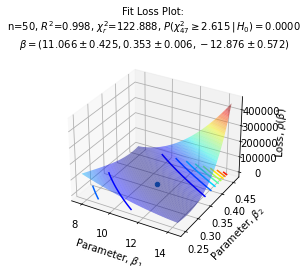

In [6]:
models[-1].plot_loss_low_dimension(first_index=0, second_index=1, surface=True)

In [7]:
import matplotlib.pyplot as plt

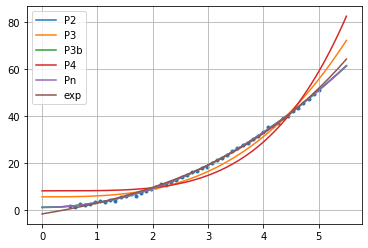

In [18]:
fig, axe = plt.subplots()
xlin = np.linspace(0., 5.5, 200).reshape(-1, 1)
axe.scatter(data["x0"], data["y"], marker=".")
for model in models:
    axe.plot(xlin, model.predict(xlin), label=model.__class__.__name__)
axe.legend()
axe.grid()